## data preprocessing

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('software_engineer_salaries_india.csv')

# Display the first few rows of the dataset
print(data.head())


  education_qualification  years_of_experience   salary
0                     PhD                    2   619062
1               Bachelors                   18  1222911
2                     PhD                    7  1062556
3                     PhD                    4   838131
4               Bachelors                    3   451969


In [2]:
data.head(8)

,education_qualification,years_of_experience,salary
0,PhD,2,619062
1,Bachelors,18,1222911
2,PhD,7,1062556
3,PhD,4,838131
4,Bachelors,3,451969
5,Bachelors,5,593753
6,PhD,1,572811
7,Masters,19,1684470


## Exploratory Data Analysis

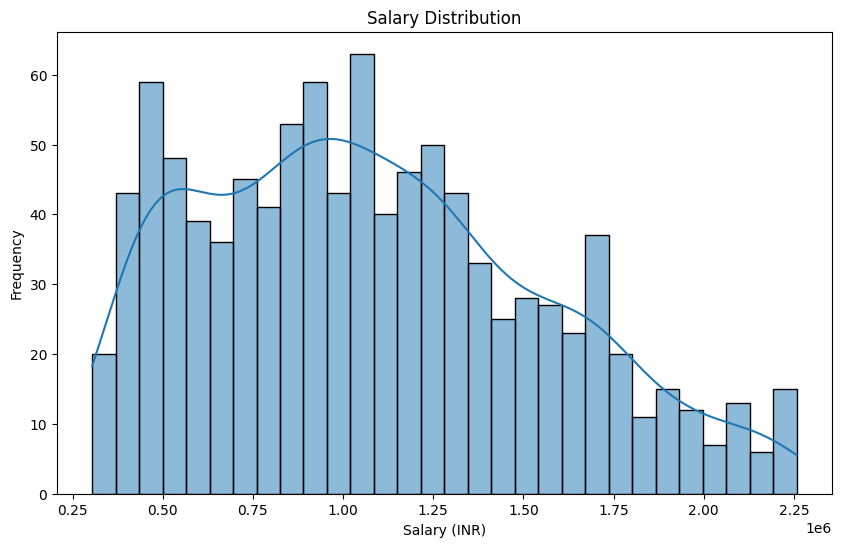

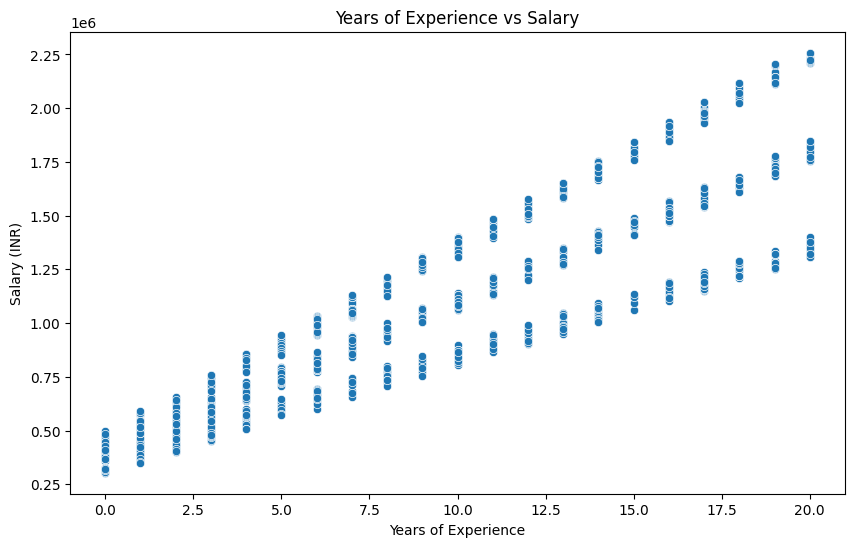

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of salaries
plt.figure(figsize=(10, 6))
sns.histplot(data['salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary (INR)')
plt.ylabel('Frequency')
plt.show()

# Plotting the relationship between years of experience and salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='years_of_experience', y='salary', data=data)
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (INR)')
plt.show()


## Feature Engineering

In [4]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding the education qualification
encoder = OneHotEncoder()
education_encoded = encoder.fit_transform(data[['education_qualification']])

# Convert the encoded education qualification to a DataFrame
education_encoded_df = pd.DataFrame(education_encoded.toarray(), columns=encoder.get_feature_names_out(['education_qualification']))

# Concatenate the original dataset with the encoded features
data = pd.concat([data, education_encoded_df], axis=1)

# Drop the original education_qualification column
data.drop(['education_qualification'], axis=1, inplace=True)


## Model Selection

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Define features and target
X = data.drop(['salary'], axis=1)
y = data['salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
linear_regressor = LinearRegression()
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


## Model Training

In [6]:
# Train the Linear Regression model
linear_regressor.fit(X_train, y_train)

# Train the Random Forest Regressor model
random_forest_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## Model Evaluaiton

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
linear_predictions = linear_regressor.predict(X_test)
rf_predictions = random_forest_regressor.predict(X_test)

# Evaluate Linear Regression model
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)

# Evaluate Random Forest Regressor model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

print(f"Linear Regression MAE: {linear_mae}")
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Random Forest Regressor MAE: {rf_mae}")
print(f"Random Forest Regressor RMSE: {rf_rmse}")


Linear Regression MAE: 73412.91683360323
Linear Regression RMSE: 95065.45865308173
Random Forest Regressor MAE: 25615.16948498614
Random Forest Regressor RMSE: 29607.91986798776


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Model Deployment

# flask backend

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import joblib

# Load the dataset
data = pd.read_csv('software_engineer_salaries_india.csv')

# One-hot encoding the education qualification
encoder = OneHotEncoder()
education_encoded = encoder.fit_transform(data[['education_qualification']])

# Convert the encoded education qualification to a DataFrame
education_encoded_df = pd.DataFrame(education_encoded.toarray(), columns=encoder.get_feature_names_out(['education_qualification']))

# Concatenate the original dataset with the encoded features
data = pd.concat([data, education_encoded_df], axis=1)

# Drop the original education_qualification column
data.drop(['education_qualification'], axis=1, inplace=True)

# Define features and target
X = data.drop(['salary'], axis=1)
y = data['salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)

# Save the model and encoder
joblib.dump(random_forest_regressor, 'random_forest_regressor.pkl')
joblib.dump(encoder, 'encoder.pkl')


['encoder.pkl']

# for login and about

In [16]:
from flask import Flask, request, jsonify, render_template, redirect, url_for
import numpy as np
import joblib
import os

app = Flask(__name__)
app.secret_key = 'supersecretkey'  # Needed for session management

# Load the model and encoder
MODEL_PATH = 'random_forest_regressor.pkl'
ENCODER_PATH = 'encoder.pkl'

# Check if the model and encoder files exist
if not os.path.exists(MODEL_PATH) or not os.path.exists(ENCODER_PATH):
    raise FileNotFoundError("Model or Encoder file not found. Please ensure the files are available.")

random_forest_regressor = joblib.load(MODEL_PATH)
encoder = joblib.load(ENCODER_PATH)

@app.route('/')
def login():
    return render_template('login2.html')

@app.route('/about')
def about():
    return render_template('about.html')

@app.route('/index')
def home():
    return render_template('index.html')

@app.route('/')
def back():
    return render_template('login.html')

@app.route('/login', methods=['POST'])
def do_login():
    username = request.form['username']
    password = request.form['password']
    # Here you would normally check the username and password against a database
    # For simplicity, we'll just allow any non-empty username and password
    if username and password:
        return redirect(url_for('about'))
    return render_template('login.html', error="Invalid credentials, please try again.")

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json(force=True)
        
        if 'education_qualification' not in data or 'years_of_experience' not in data:
            return jsonify({'error': 'Invalid input data. Please provide education_qualification and years_of_experience.'}), 400
        
        education_qualification = data['education_qualification']
        years_of_experience = data['years_of_experience']
        
        education_encoded = encoder.transform([[education_qualification]]).toarray()
        
        input_array = np.array([years_of_experience] + education_encoded.tolist()[0]).reshape(1, -1)
        
        prediction = random_forest_regressor.predict(input_array)
        
        return jsonify({'predicted_salary': prediction[0]})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [18/Aug/2024 11:57:27] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Aug/2024 11:57:34] "POST /login HTTP/1.1" 302 -
127.0.0.1 - - [18/Aug/2024 11:57:34] "GET /about HTTP/1.1" 200 -
127.0.0.1 - - [18/Aug/2024 11:57:37] "GET /index HTTP/1.1" 200 -
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
127.0.0.1 - - [18/Aug/2024 11:57:54] "POST /predict HTTP/1.1" 200 -
